In [18]:
import numpy as np
import matplotlib.pyplot as plt

def verify_eckart_young(A, k):
    # 1. SVD
    U, S, Vt =np.linalg.svd(A, full_matrices=False)

    # 2. Reconstruct A_k (Rank k)
    # TODO: reuse your previous logic or copy/paste
    Sigma_k = np.diag(S[:k])
    A_k = U[:, :k] @ Sigma_k @ Vt[:k, :]

    # 3. Compute Residual Matrix
    residual = A - A_k

    # 4. Compute Spectral Norm or Residual
    # TODO: norm_res = np.linalg.norm(residual, 2)
    norm_res = np.linalg.norm(residual, 2)

    # 5. Theoretical Prediction
    # The error should be exactly the next singular value (S[k])
    # TODO: predicted_error = S[k]
    predicted_error = S[k]

    print(f"k={k}")
    print(f"Spectral Norm or Residual: {norm_res}")
    print(f"Singular Value sigma_{k+1}: {predicted_error}")

    # TODO: allclose
    assert np.allclose(norm_res, predicted_error), f"Check your code: {norm_res} vs sigma_{k+1}: {predicted_error}"


In [19]:
# Setup: Random matrix (full rank usually)
A = np.random.randn(50, 50)

# Run for different k
verify_eckart_young(A, k=1)
print()
verify_eckart_young(A, k=10)
print()
verify_eckart_young(A, k=49) # Error should be S[49] (the last one)

k=1
Spectral Norm or Residual: 12.772104270622625
Singular Value sigma_2: 12.77210427062263

k=10
Spectral Norm or Residual: 9.907292198707934
Singular Value sigma_11: 9.90729219870793

k=49
Spectral Norm or Residual: 0.011389128132233268
Singular Value sigma_50: 0.011389128132234083


In [20]:
# Experiment
spec = np.linalg.norm(np.diag([3, 4]), 2)
fro = np.linalg.norm(np.diag([3, 4]), 'fro')

print(f'Norm spectral: {spec}')
print(f'\nfrobenius: {fro}')

Norm spectral: 4.0

frobenius: 5.0


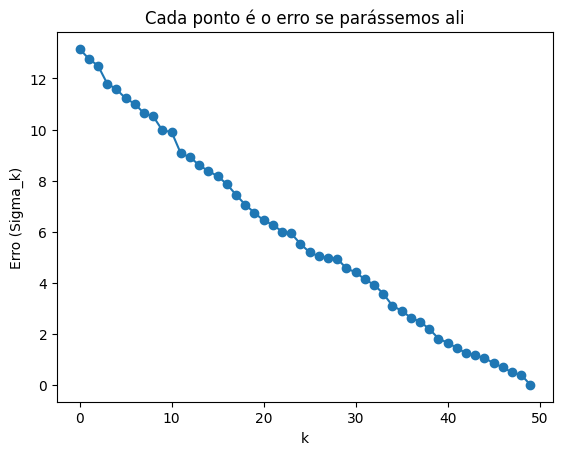

In [21]:
# Visualize a queda do erro (Curva de Cotovelo/Elbow Curve)
# Isso é muito usado para decidir qual 'k' escolher na vida real
singular_values = np.linalg.svd(A, compute_uv=False)
plt.plot(singular_values, 'o-')
plt.title("Cada ponto é o erro se parássemos ali")
plt.xlabel("k")
plt.ylabel("Erro (Sigma_k)")
plt.show()